<a href="https://colab.research.google.com/github/SID1060/DataGlimpse/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective for Churn Modeling**

The objective of this churn modeling project is to predict customer churn for a given dataset using machine learning techniques. Customer churn refers to the phenomenon where customers stop doing business with a company. Accurately predicting churn allows businesses to take proactive measures to retain customers, thereby reducing loss and improving revenue.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')  #dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info() #info about the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()  #basic description of dataset

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# data.isnull().sum()   #null points in dataset

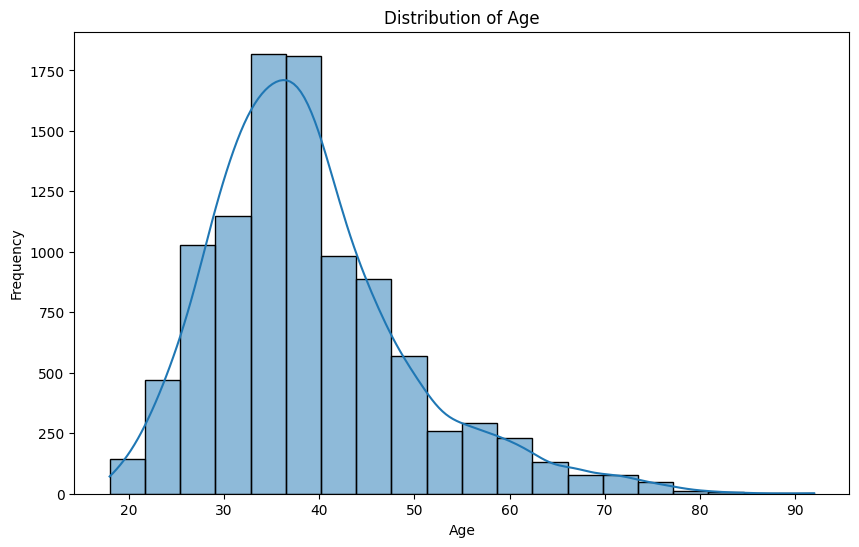

In [6]:
#Distribution of Age( different age group frequency)

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

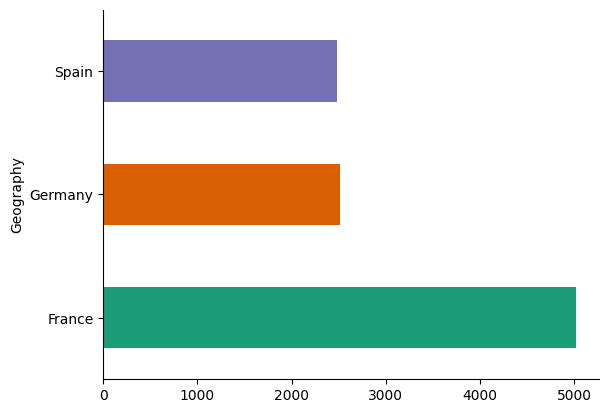

In [7]:
data.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

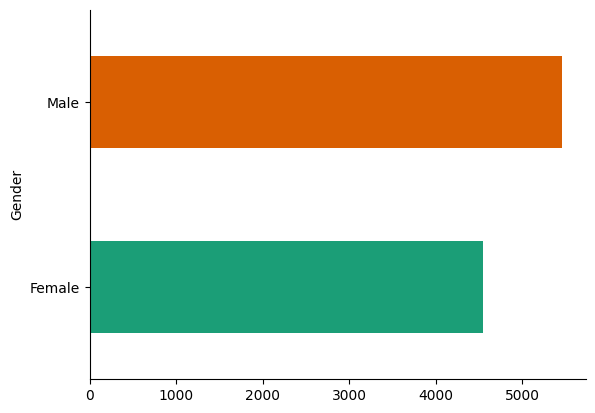

In [8]:
data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

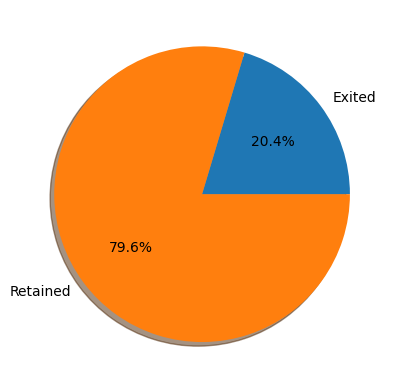

In [9]:
lables = ['Exited', 'Retained']
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
plot = plt.pie(sizes, labels=lables, autopct='%1.1f%%', shadow=True)
plt.gca().spines[['top', 'right',]].set_visible(False)

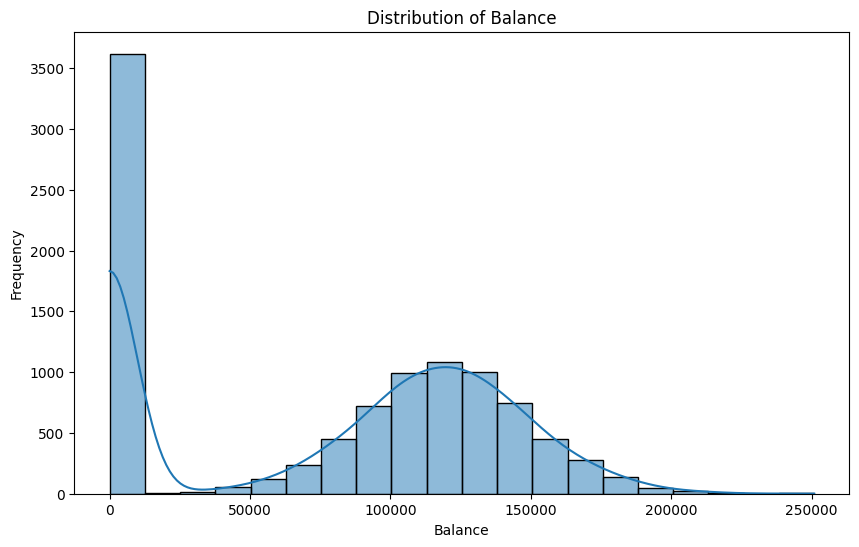

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Balance'], bins=20, kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

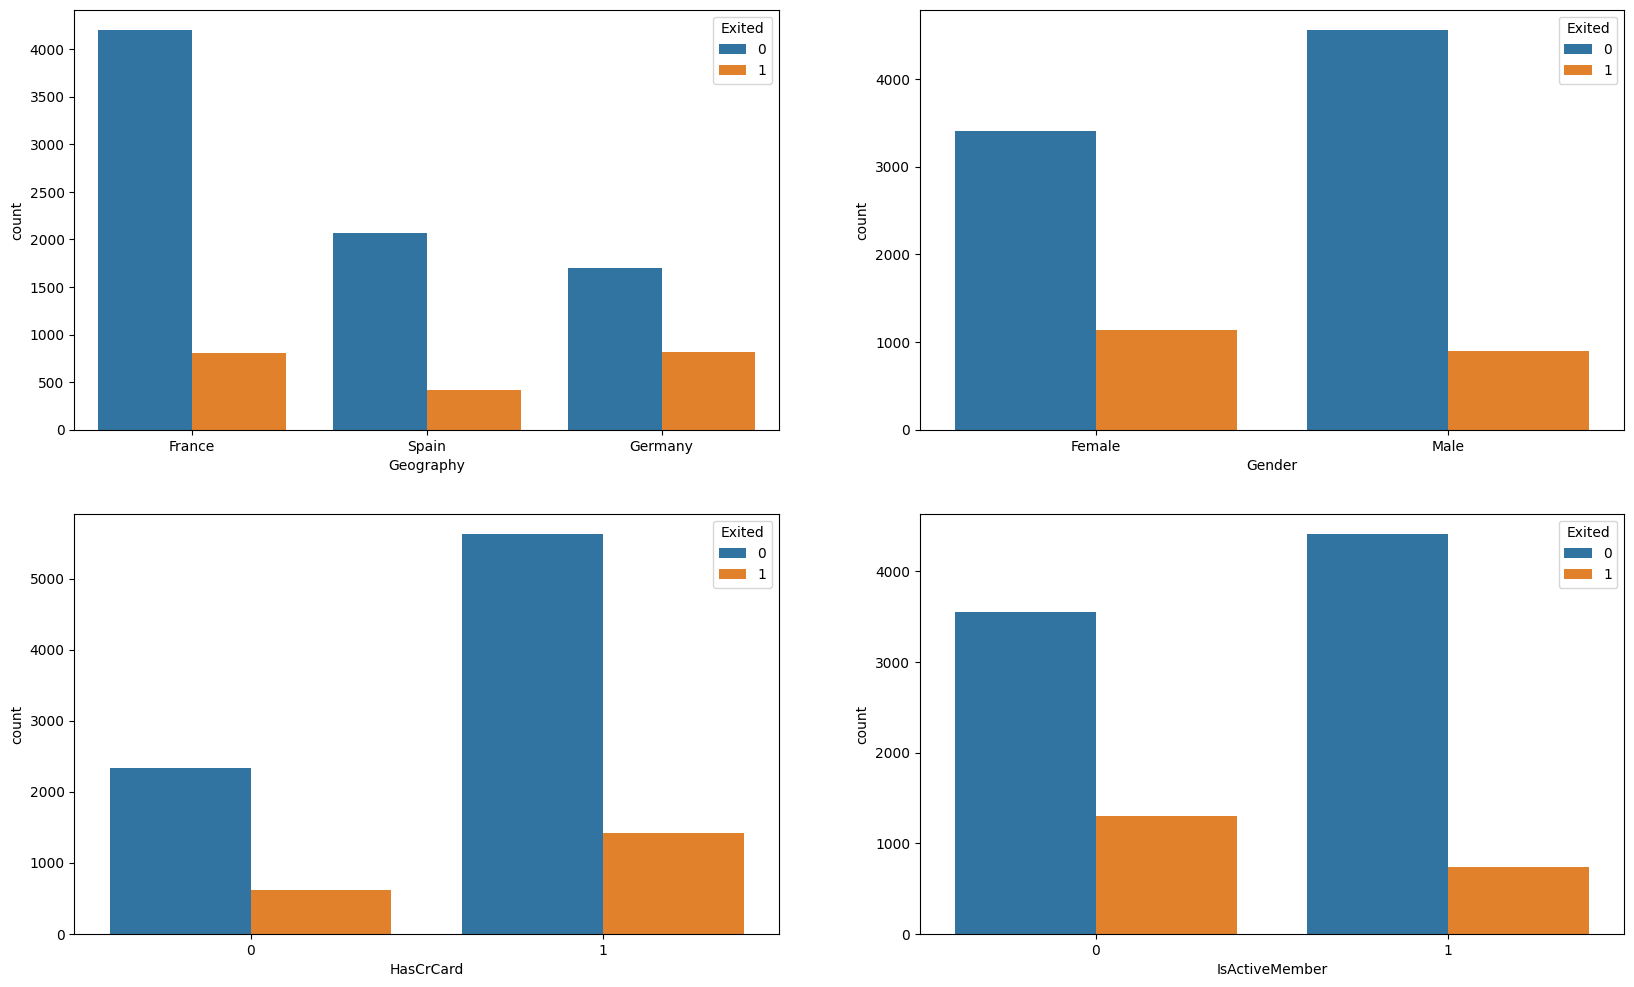

In [11]:
#exited or not from different perspective

fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x='Geography', hue='Exited', data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data = data, ax=axarr[1][1])

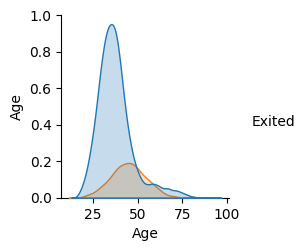

In [12]:
#exited based on the age
sns.pairplot(data[['Age', 'Exited']], hue='Exited')

Based on the above:

Newly joined exited rate is more.

people of older age are less due to because they want stability.

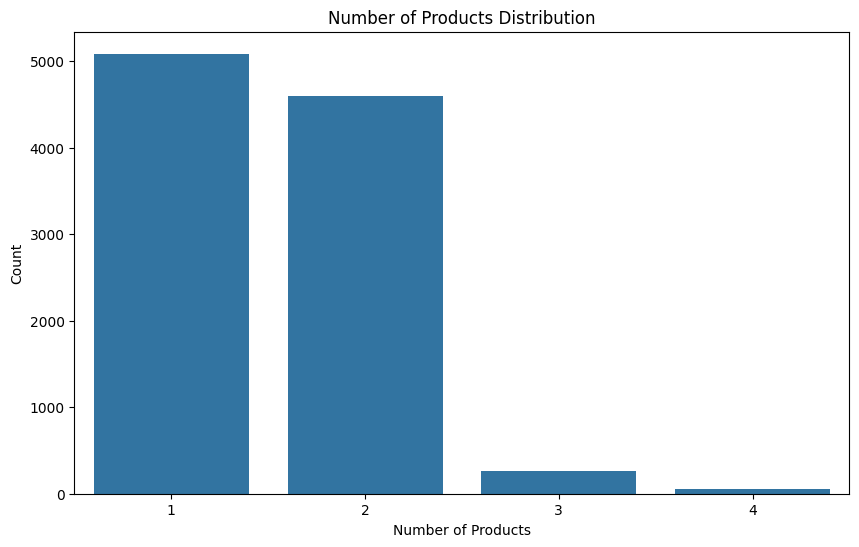

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=data)
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

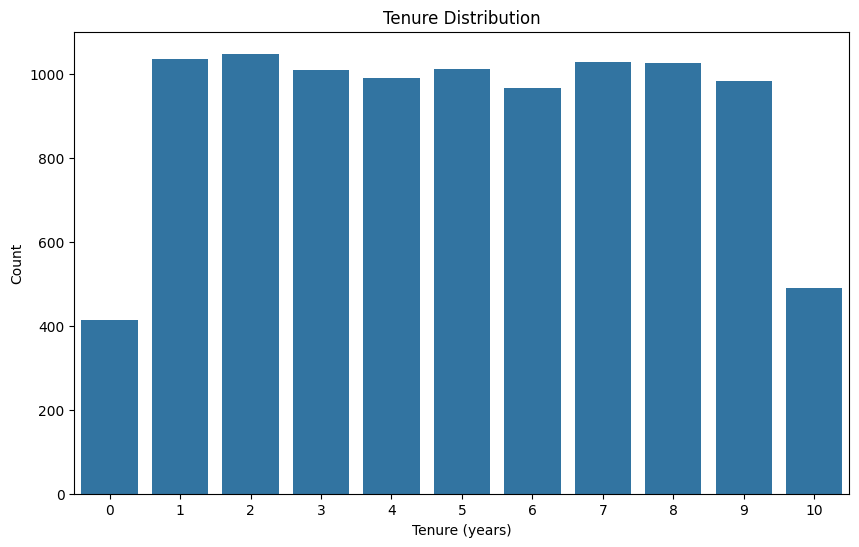

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=data)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

**Data Modelling**

In [15]:
x = pd.get_dummies(data)
x = x.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [16]:
x.shape

(10000, 2948)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [19]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [20]:
# data.head()

In [21]:
y = data['Exited']
x = data.drop('Exited', axis=1)

In [22]:
x = pd.get_dummies(x)
x = x.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [23]:
# x.head()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = model.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [29]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.7992


In [30]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1710  281]
 [ 221  288]]


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



*   Accuracy: Measures overall correctness. High accuracy indicates the model predicts churn and non-churn customers well.
*   Precision: Indicates the percentage of true churners among those predicted as churners. Important for minimizing false positives (i.e., not mistakenly targeting non-churners).
*   Recall: Measures the percentage of actual churners correctly identified. Crucial for capturing as many churners as possible to prevent customer loss.
*   F1-Score: Balances precision and recall, providing a single metric for model performance.





In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.80
Precision: 0.51
Recall: 0.57
F1-Score: 0.53


In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1991
           1       0.51      0.57      0.53       509

    accuracy                           0.80      2500
   macro avg       0.70      0.71      0.70      2500
weighted avg       0.81      0.80      0.80      2500





*   High Precision: Ensures marketing efforts target actual churners, optimizing budget allocation.

*   High Recall: Helps in identifying most potential churners, crucial for retention strategies.



In [32]:
# for pred in y_pred:
#     if pred == 0:
#         print('Customer will not leave')
#     else:
#         print('Customer will leave')

In [38]:
# Assuming you have already split your dataset and trained your model
# Example code for context
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


**Hyperparameter Tuning:** Improves model accuracy, leading to better decision-making and resource optimization.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Best Score: 0.86
Accuracy (Tuned): 0.86
Precision (Tuned): 0.76
Recall (Tuned): 0.44
F1-Score (Tuned): 0.55


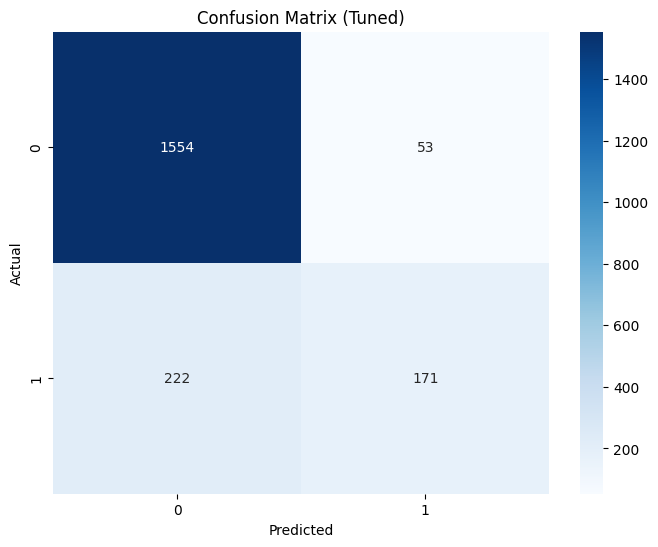

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider at each split
    'max_depth': [4, 6, 8, 10],                     # Maximum depth of the tree
    'criterion': ['gini', 'entropy']                # Function to measure the quality of a split
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

# Evaluate the Tuned Model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

#Calculate and print performance metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f'Accuracy (Tuned): {accuracy_tuned:.2f}')
print(f'Precision (Tuned): {precision_tuned:.2f}')
print(f'Recall (Tuned): {recall_tuned:.2f}')
print(f'F1-Score (Tuned): {f1_tuned:.2f}')

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_tuned = classification_report(y_test, y_pred_tuned)
print(report_tuned)


The F1-score provides a single metric that balances both precision and recall, ensuring that the model is neither over-predicting churn (low precision) nor missing many at-risk customers (low recall). A high F1-score means the model is robust and reliable for practical use in churn prediction.
